In [7]:
import pandas as pd
from pandas.io.json import json_normalize

from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

pd.set_option('display.max_columns', 500)

In [41]:
df = pd.read_parquet('./lateral.snappy.parquet', engine='pyarrow')

In [42]:
df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,player.summonerId,player.summonerName,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end
0,2018-01-01 01:44:02.009,866,2684129583,SNOWURF,MATCHED_GAME,7.24.212.5337,11,NA1,1010,9,1,35897455,35897455,NA1,/v1/stats/player_history/NA/35897455,NA,3168,22208345.0,Xcuter,76,SILVER,4,39,2,11,0,3586,1920,3934,8,0,False,False,False,False,False,False,8364,6535,0,3285,2424,3020,1058,1026,1052,3340,1,4,279,2,1,190,52768,8360,7316,4,0.0,0.0,0,1,0,8229.0,883.0,0.0,0.0,8224.0,427.0,0.0,0.0,8234.0,17.0,0.0,0.0,8237.0,3

In [49]:
df.iloc[:,32].head()

0    False
1    False
2    False
3    False
4    False
Name: stats.firstBloodKill, dtype: bool

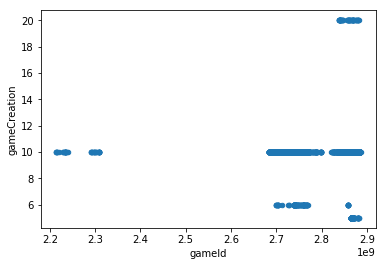

In [117]:
# definitely too many people in some of these games
df.groupby('gameId', as_index=False).count()[['gameId', 'gameCreation']].plot(kind='scatter', x='gameId', y='gameCreation')

MultiIndex(levels=[['championId', 'gameId'], ['count', '']],
           labels=[[1, 0], [1, 0]])